# Config and Import

In [2]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

# Read files

In [5]:
ruta = '../data/'

df_sales = pd.read_csv(ruta+'sales_cleandata.csv')

In [27]:
df_sales.head()

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414


In [6]:
df_sales['sell_price'].isnull().sum()

0

In [7]:
df_sales[df_sales['sell_price'].isnull()]

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price


In [8]:
df_sales[df_sales['sell_price'].isnull()]['yearweek'].value_counts()

Series([], Name: count, dtype: int64)

In [9]:
df_sales['revenue']=df_sales['qty_sold']*df_sales['sell_price']

# Preparar dataframe para clustering

In [32]:
df_features = df_sales.groupby('item').agg(
                        total_sales = ('qty_sold', 'sum'),
                        min_sales = ('qty_sold', 'min'),
                        mean_sales = ('qty_sold', 'mean'),
                        max_sales = ('qty_sold', 'max'),
                        min_price = ('sell_price', 'min'),
                        max_price = ('sell_price', 'max'),    
                        total_revenue = ('revenue', 'sum'),
                        mean_revenue = ('revenue', 'mean')

                    )
df_features.sample(15)

#al hacer el groupby ya tenemos el item como index

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue
item,,,,,,,,
ACCESORIES_2_117,6300,0,2.299270,27,3.2984,3.8304,23459.8700,8.561996
SUPERMARKET_1_099,63632,0,23.223358,159,1.1280,1.1760,74453.7600,27.172905
HOME_&_GARDEN_2_276,1834,0,0.669343,16,6.8375,6.8375,12539.9750,4.576633
HOME_&_GARDEN_1_479,10488,0,3.827737,18,8.7250,9.4500,98231.8500,35.851040
SUPERMARKET_3_606,11591,0,4.230292,56,2.4000,3.4560,39936.1200,14.575226
HOME_&_GARDEN_1_393,34248,0,12.499270,85,1.2375,2.4750,84699.2875,30.912149
HOME_&_GARDEN_1_472,5122,0,1.869343,13,4.7750,6.6000,30878.9875,11.269703
HOME_&_GARDEN_1_296,3655,0,1.333942,16,2.4875,6.2125,22489.2375,8.207751
SUPERMARKET_3_682,57762,0,21.081022,203,3.0000,4.2720,242819.6160,88.620298


# Clustering

In [33]:
pipe = Pipeline(steps = [
    #("Imputer", KNNImputer()), --> No tenemos nulos
    #("CustomTransformer", ClientIdFeatureGenerator), # Aqui añadimos el Transformer que hemos generado
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #es un Scaler para quitar los outliers superiores en este caso
])

In [34]:
df_scaled_transformed = pipe.fit_transform(df_features)

In [35]:
df_scaled_transformed

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue
item,,,,,,,,
ACCESORIES_1_001,-0.028417,0.0,-0.028417,-0.033986,0.246068,0.340870,0.003018,0.003018
ACCESORIES_1_002,-0.023364,0.0,-0.023364,0.005098,0.015054,0.035379,-0.030747,-0.030747
ACCESORIES_1_003,-0.042319,0.0,-0.042319,-0.028888,-0.066572,0.144288,-0.069559,-0.069559
ACCESORIES_1_004,0.155075,0.0,0.155075,0.083265,0.151352,0.071864,0.353998,0.353998
ACCESORIES_1_005,0.026649,0.0,0.026649,0.015294,-0.023449,-0.013085,0.022629,0.022629
...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,0.030660,0.0,0.030660,0.108755,-0.070173,-0.034392,0.013823,0.013823
SUPERMARKET_3_824,-0.006282,0.0,-0.006282,-0.008496,0.000000,-0.049132,-0.033132,-0.033132
SUPERMARKET_3_825,0.020921,0.0,0.020921,0.042482,-0.000695,0.034392,0.041319,0.041319


In [36]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled_transformed)

    sse[k] = clustering_model.inertia_ #la metrica inertia es la dispersion

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters


Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


## Elbow curve

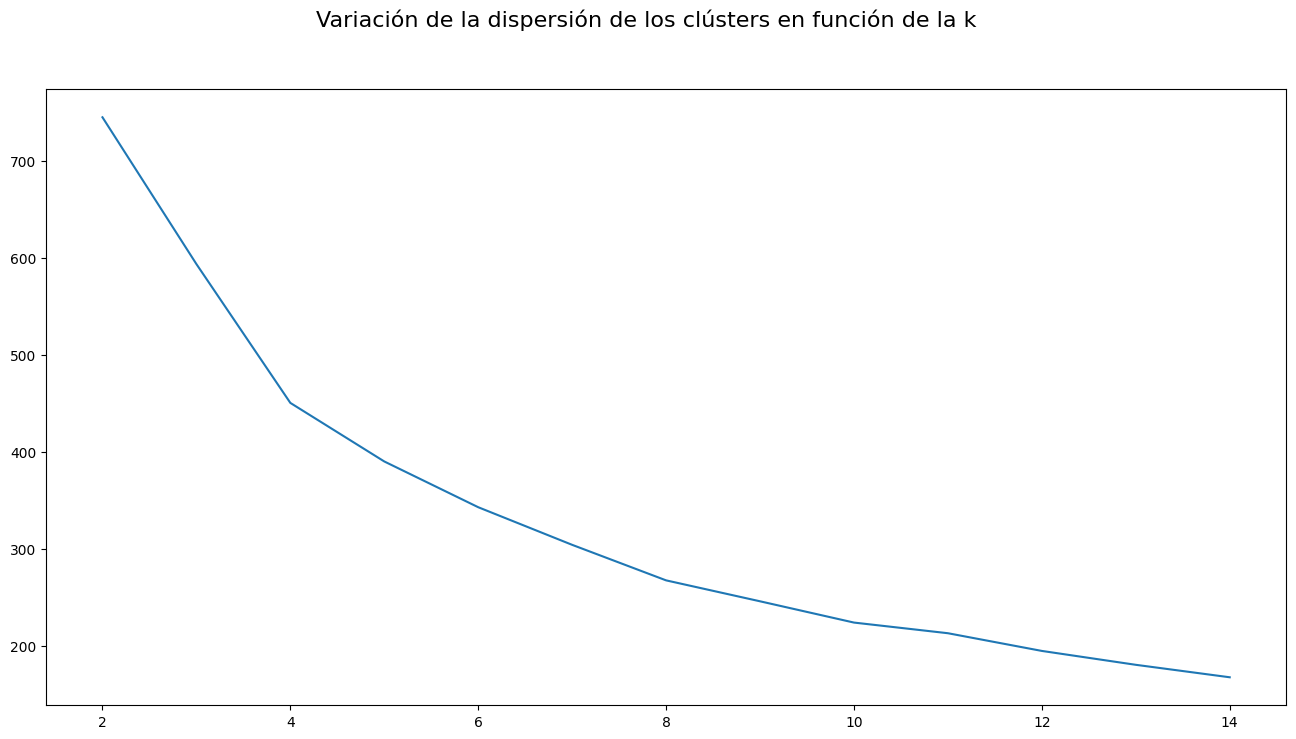

In [37]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Vemos que hay dos puntos donde hay diferencia en la pendiente, uno con 4 clusters y otro mas pronunciado con 8. Este es el que cogemos

## Segmentación de los clientes con la "k adecuada"

In [38]:
## Añadimos el clstering a la pipeline 

pipe = Pipeline(steps = [
    
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 8, random_state = 175))
])

In [39]:
#nos sirve para ver todos los pasos de la pipeline a la vez que fiteamos
pipe.fit(df_features)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(random_state=175))])

In [40]:
#X_processed = pipe[:2].transform(df_features)
X_processed = df_features.copy() 
#para poder analizar las variables sin escalado nos saltamos los ultimos pasos y procesamos los datos iniciales justo antes del escalado

In [41]:
labels = pipe.predict(df_features)
X_processed["cluster"] = labels

In [42]:
X_processed.shape

(3049, 9)

In [43]:
X_processed.head()

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,cluster
item,,,,,,,,,
ACCESORIES_1_001,4093,0,1.493796,13,6.6500,12.7414,45020.6596,16.430898,4
ACCESORIES_1_002,5059,0,1.846350,36,2.6600,5.2801,26705.4557,9.746517,1
ACCESORIES_1_003,1435,0,0.523723,16,1.2502,7.9401,5652.2340,2.062859,1
ACCESORIES_1_004,39175,0,14.297445,82,5.0141,6.1712,235405.2253,85.914316,7
ACCESORIES_1_005,14621,0,5.336131,42,1.9950,4.0964,55658.1991,20.313211,1


# Ficha de los productos

In [44]:
ficha_df = pd.DataFrame()

In [45]:
df_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue'],
      dtype='object')>

In [46]:
resumen_data = X_processed[["cluster", 'total_sales']].groupby("cluster").describe().T[1:]
resumen_data

cluster                       0             1              2             3  \
total_sales mean  139125.406593  10132.662299   56823.272727  9.613855e+05   
            std    42058.702999   7261.048109   31811.586710  5.818570e+04   
            min    52598.000000    568.000000   13484.000000  9.202420e+05   
            25%   109179.000000   4178.500000   29644.000000  9.408138e+05   
            50%   129481.000000   8277.000000   52535.000000  9.613855e+05   
            75%   166001.000000  14599.500000   72990.000000  9.819572e+05   
            max   262650.000000  37035.000000  162173.000000  1.002529e+06   

cluster                      4             5              6              7  
total_sales mean   6882.095166   6061.101010  327373.000000   45030.229858  
            std    5359.331199   4772.294922   93322.398133   19017.343374  
            min     746.000000    855.000000  222594.000000   11616.000000  
            25%    2939.000000   2646.000000  272624.000000   30318.250000  
            50%    5239.500000   4358.000000  283104.000000   39451.000000  
            75%    9521.250000   8426.000000  390001.000000   56655.250000  
            max   30415.000000  20921.000000  565299.000000  112005.000000

In [47]:
for i, col in enumerate(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue']):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

In [48]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)